<h1> Ajuste de Curva - Mínimos Quadrados</h1>
<h3> Testes dos métodos implementados em C (via DLL)</h3>

In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt

# Carrega a biblioteca (deve ser a DLL atualizada)
lib = ctypes.CDLL("./metodos.dll")

# Tipos de array C
DoubleArray = ctypes.POINTER(ctypes.c_double)
VoidPtr = ctypes.c_void_p

# --- Mínimos Quadrados ---
lib.minimos_quadrados.restype = DoubleArray
lib.minimos_quadrados.argtypes = [ctypes.c_int, ctypes.c_int, DoubleArray, DoubleArray]

lib.test_minimo_quadrados.restype = ctypes.c_double
lib.test_minimo_quadrados.argtypes = [ctypes.c_double, DoubleArray, ctypes.c_int]

# --- Função de Limpeza ---
lib.free_memory.restype = None
lib.free_memory.argtypes = [VoidPtr]

def test(grau, x_pontos, y_pontos):
    n = len(x_pontos)
    DoubleArrayType_n = ctypes.c_double * n

    x_c = DoubleArrayType_n(*x_pontos)
    y_c = DoubleArrayType_n(*y_pontos)

    # 1. Calcula os coeficientes (a0, a1, ..., agrau)
    # A função C retorna um ponteiro para 'grau + 1' coeficientes
    coef = lib.minimos_quadrados(grau, n, x_c, y_c)
    num_coefs = grau + 1

    # Gera 100 pontos no eixo x para plotar a curva
    xs = np.linspace(min(x_pontos) - 1, max(x_pontos) + 1, 100)

    # 2. Calcula os valores Y da curva ajustada
    # ** CORREÇÃO APLICADA AQUI **
    # A função C 'test_minimo_quadrados' espera o NÚMERO DE COEFICIENTES (num_coefs)
    # e não o número de pontos (n).
    ys = [lib.test_minimo_quadrados(float(xi), coef, num_coefs) for xi in xs]

    print(f"Coeficientes do polinômio de grau {grau}:")
    for i in range(num_coefs):
        print(f"  a[{i}] = {coef[i]}")

    plt.clf() 

    # Plota os pontos originais
    plt.scatter(x_pontos, y_pontos, color='red', label='Dados Originais', zorder=5)

    # Plota a curva ajustada
    plt.plot(xs, ys, color='black', label=f'Ajuste (Grau {grau})')

    # 3. Libera a memória dos coeficientes alocados pelo C
    lib.free_memory(coef)

    plt.legend()
    plt.grid(True)
    plt.show()

Coeficientes do polinômio de grau 2:
  a[0] = -2.0285714285714294
  a[1] = 1.0
  a[2] = 4.714285714285714


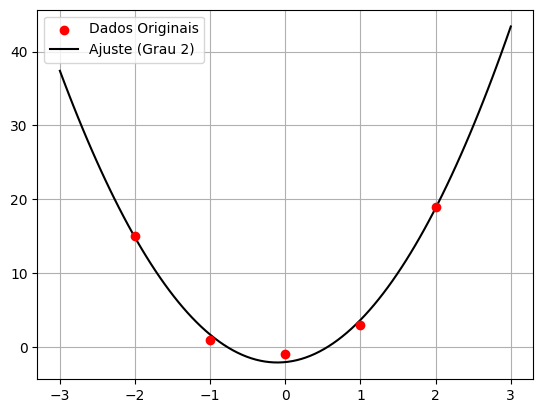

In [2]:
# Teste original (Grau 2)
test(2, [ -2.0, -1.0,  0.0,  1.0,  2.0], [ 15.0,  1.0, -1.0,  3.0, 19.0])

Coeficientes do polinômio de grau 1:
  a[0] = 0.049999999999998226
  a[1] = 0.9900000000000005


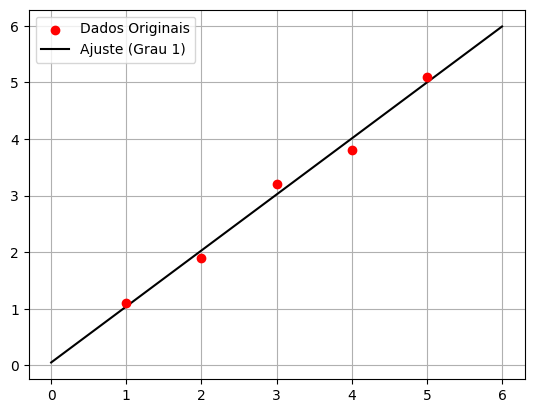

In [3]:
# Novo teste (Grau 1 - Regressão Linear)
test(1, [1.0, 2.0, 3.0, 4.0, 5.0], [1.1, 1.9, 3.2, 3.8, 5.1])